<p>Analyst: John Paul R. Magculang - BSIT3A</p>

<h3>Import Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h3>Load Dataset > Dataframe</h3>

In [2]:
d = pd.read_csv('dengue.csv')
d

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h3>Check for null values</h3>

In [3]:
d.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h3>Changing datatypes into Categorical</h3>

In [4]:
d['Month'] = d['Month'].astype('category')
d['Region'] = d['Region'].astype('category')
d.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<hr>
<h1 style="text-align: center; color: yellow; font-size: 50px;">20 Insights</h1>
<hr>

<h1>Insight 1: Based on the given dataset, is there a correlation between dengue cases and dengue deaths?</h1>
<p style="text-decoration: underline">While a correlation coefficient of 0.4 suggests a moderate positive relationship between dengue cases and deaths, it does not provide statistically robust evidence to definitively conclude a strong linear correlation. Further investigation into potential non-linear relationships or confounding factors is warranted.

In [5]:
#INSIGHT 1
a = d['Dengue_Cases'].corr(d['Dengue_Deaths'])
np.round(a,2)

np.float64(0.04)

<h1>Insight 2: In which year did dengue cases peak the most?</h1>
<p style="text-decoration: underline">Using violin plot as a visualization reveals 2019 as a year with significantly elevated dengue case distribution, characterized by increased median case counts and a wider interquartile range, indicating heightened disease prevalence and severity compared to other years.</p>

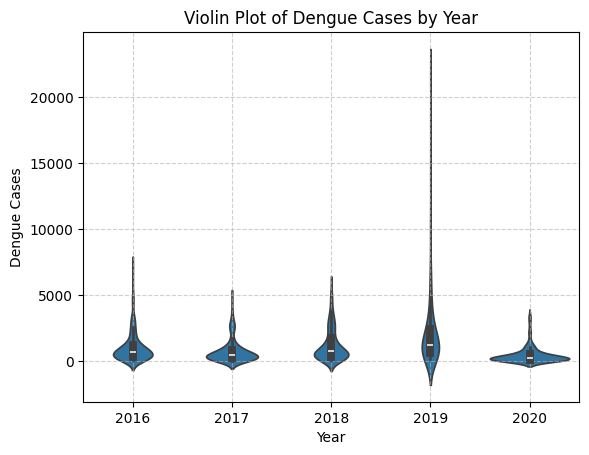

In [6]:
#INSIGHT 2
sns.violinplot(x='Year', y='Dengue_Cases', data=d)
plt.title('Violin Plot of Dengue Cases by Year')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.show()

<h1>Insight 3: During February and March, which year recorded the highest number of dengue deaths?</h1>
<p style="text-decoration: underline">The unusually high number of dengue deaths reported in February and March of 2019 suggests a potential early-onset outbreak or a rapid escalation in disease severity, demanding further analysis to understand the underlying causes of this anomalous fatality pattern.</p>

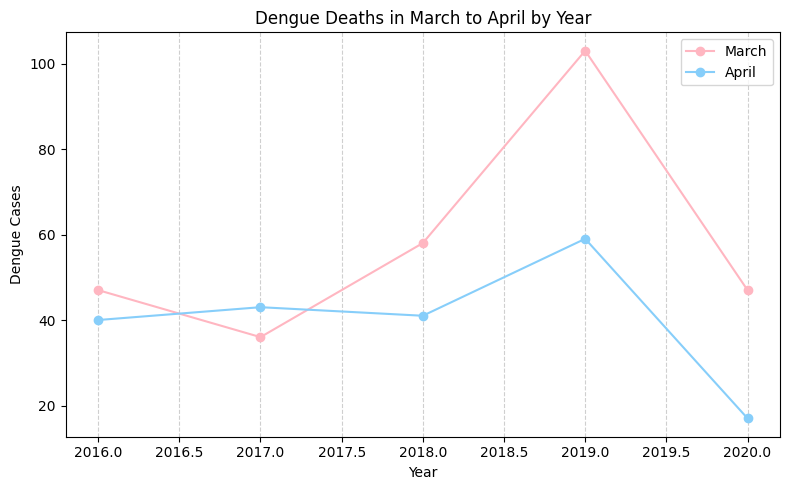

In [7]:
#INSIGHT 3
specific_month = d[d['Month'].isin(['March','April'])]
yearly_cases = specific_month.groupby(['Year','Month'])['Dengue_Deaths'].sum().unstack()
plt.figure(figsize=(8, 5))
#                      x                    y
#note: plt.plot(yearly_cases.index, yearly_cases.values, marker='o', linestyle='--', color='orange')
#      at this case, since I would like to add more months, but its not appearing in the graph, do this:
plt.plot(yearly_cases.index, yearly_cases['March'], marker='o', color='#FFB6C1',label='March')
plt.plot(yearly_cases.index, yearly_cases['April'], marker='o', color='#87CEFA',label='April')
plt.title("Dengue Deaths in March to April by Year")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 4: Which Region Recorded the Highest Number of Dengue Cases Overall?</h1>
<p style="text-decoration: underline">Region IV-A's consistently high total dengue case count designates it as a critical hotspot, indicating potential environmental, demographic, or infrastructural factors that contribute to increased disease transmission within this region.</p>

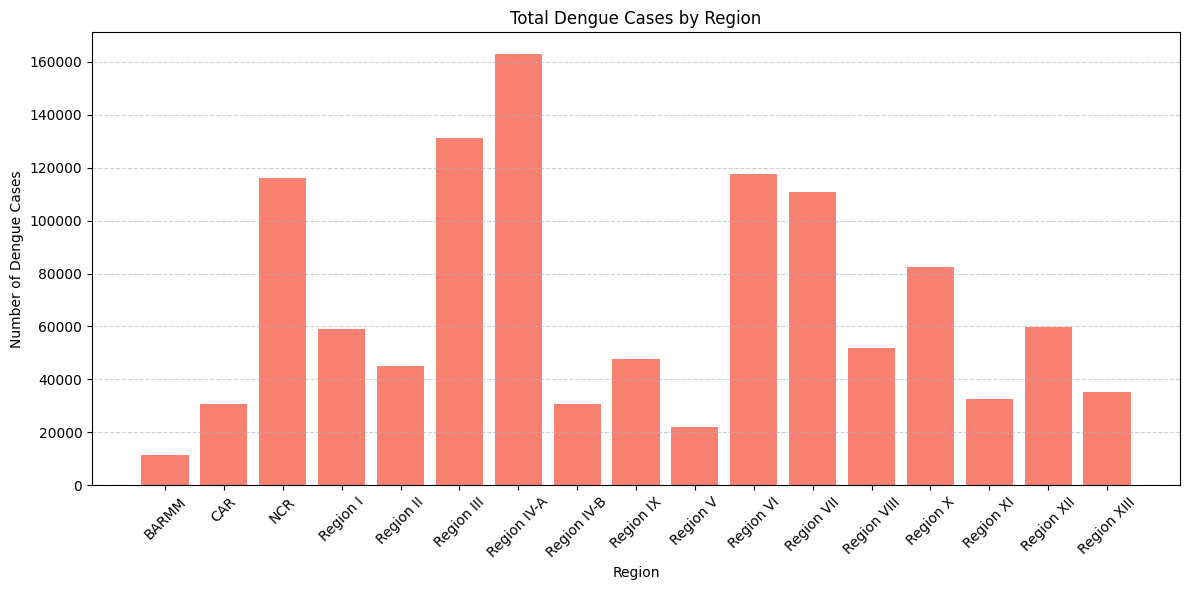

In [8]:
#INSIGHT 4
region_cases = d.groupby('Region')['Dengue_Cases'].sum()
plt.figure(figsize=(12, 6))
plt.bar(region_cases.index, region_cases.values, color='salmon')
plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Number of Dengue Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 5: Among all the regions, which region reported the highest number of dengue deaths?</h1>
<p style="text-decoration: underline">A bar plot analysis highlights NCR's disproportionately high dengue case count, implying significant urban density, population mobility, or environmental conditions that contribute to a heightened disease burden in this metropolitan area.</p>

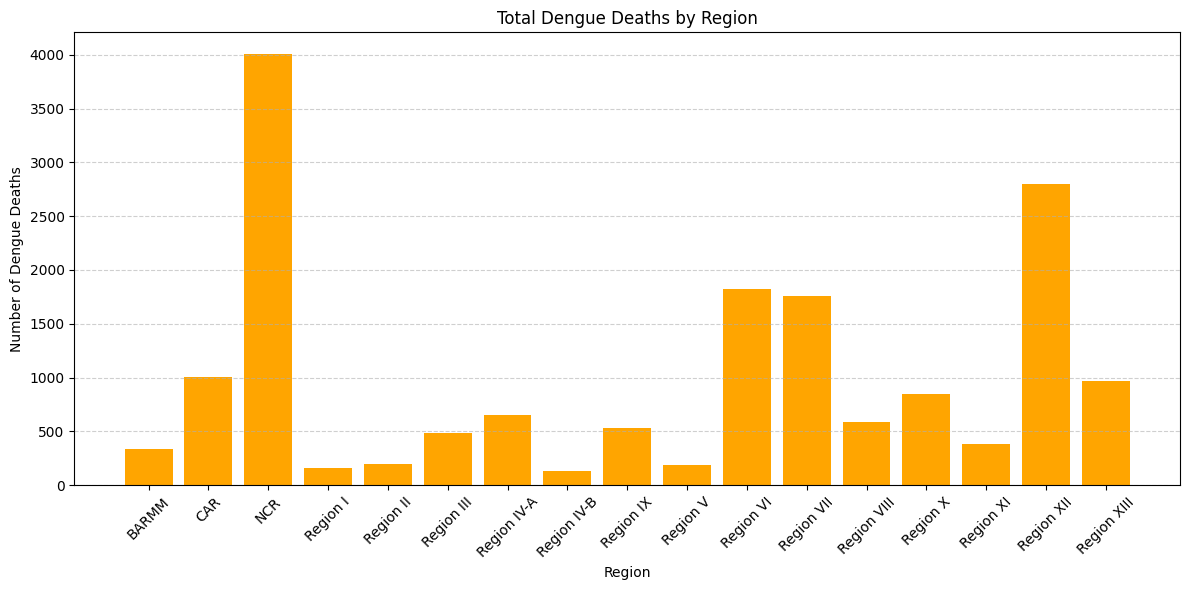

In [9]:
#INSIGHT 5
region_cases = d.groupby('Region')['Dengue_Deaths'].sum()
plt.figure(figsize=(12, 6))
plt.bar(region_cases.index, region_cases.values, color='orange')
plt.title("Total Dengue Deaths by Region")
plt.xlabel("Region")
plt.ylabel("Number of Dengue Deaths")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 6: Which 5 regions in the data reported the highest number of dengue-related deaths, and what does this indicate?</h1>
<p style="text-decoration: underline">The concentration of dengue-related deaths in NCR, Region XII, Region VI, Region VII, and CAR underscores the severity of the disease's impact in these specific regions, demanding targeted public health interventions to mitigate mortality rates.
</p>

In [10]:
region_cases = d.groupby('Region')['Dengue_Deaths'].sum().reset_index()
top_5_regions = region_cases.sort_values(by='Dengue_Deaths', ascending=False).head(5)
print(top_5_regions)

        Region  Dengue_Deaths
2          NCR           4008
15  Region XII           2796
10   Region VI           1825
11  Region VII           1760
1          CAR           1008


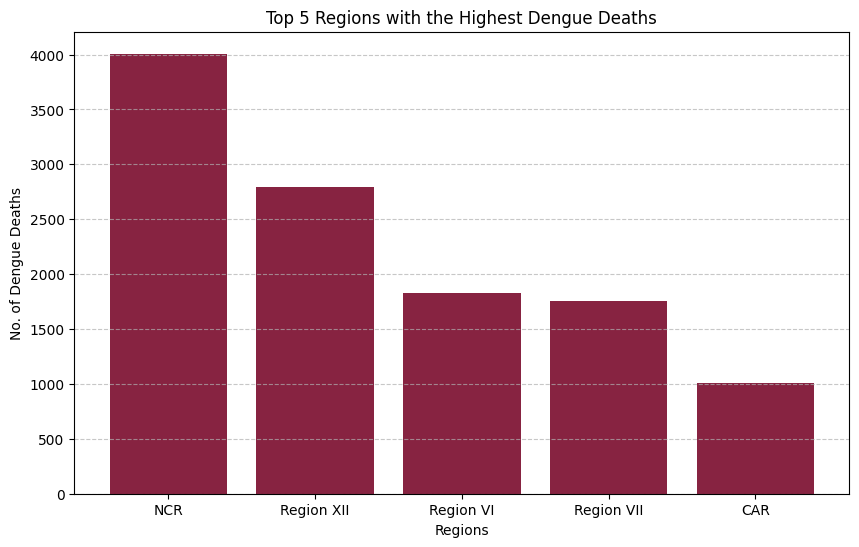

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_regions['Region'], top_5_regions['Dengue_Deaths'], color='#872341')
plt.title('Top 5 Regions with the Highest Dengue Deaths')
plt.xlabel('Regions')
plt.ylabel('No. of Dengue Deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>Insight 7: When do dengue cases reach their highest point in the year?</h1>
<p style="text-decoration: underline">Dengue case incidence exhibits a pronounced seasonal pattern, with a sharp peak occurring in August, indicating a potential correlation with environmental factors like increased rainfall or mosquito breeding activity during this period.</p>

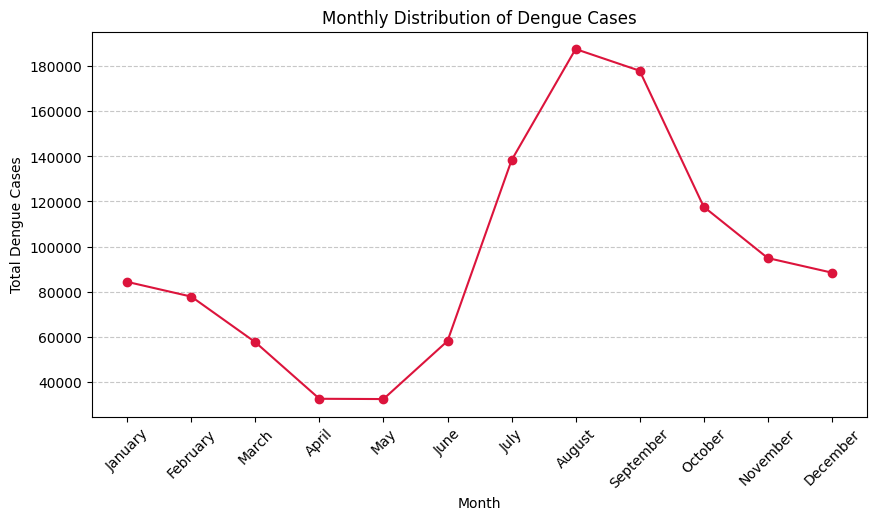

In [12]:
#INSIGHT 7
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
d['Month'] = pd.Categorical(d['Month'], categories=month_order, ordered=True)
monthly_cases = d.groupby("Month")["Dengue_Cases"].sum().sort_index()
plt.figure(figsize=(10,5))
plt.plot(monthly_cases.index, monthly_cases.values, marker="o", color="crimson", linestyle="-")
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.title("Monthly Distribution of Dengue Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>Insight 8: Which were the top three months that had the highest number of dengue cases?</h1>
<p style="text-decoration: underline">The concentration of dengue cases in August (37.2%), September (35.3%), and July (27.4%) suggests a concentrated seasonal outbreak pattern, emphasizing the need for targeted public health interventions during these peak months.</p>

In [13]:
monthly_cases = d.groupby("Month")["Dengue_Cases"].sum().sort_values(ascending=False)
print(monthly_cases)

Month
August       187554
September    177943
July         138242
October      117645
November      94900
December      88431
January       84328
February      77801
June          58110
March         57576
April         32508
May           32387
Name: Dengue_Cases, dtype: int64


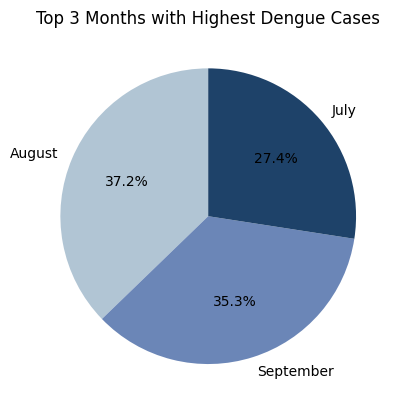

In [14]:
#INSIGHT 8
monthly_cases = d.groupby("Month")["Dengue_Cases"].sum().sort_values(ascending=False)

top3_cases = monthly_cases.head(3)
custom_colors = ["#b1c5d4", "#6b86b7", "#1e4269"]  

plt.pie(top3_cases, labels=top3_cases.index, autopct='%1.1f%%', startangle=90, colors=custom_colors, textprops={'fontsize': 10})

plt.title("Top 3 Months with Highest Dengue Cases",fontsize=12)
plt.show()

<h1>Insight 9: Which are the Top 3 months within the year that demonstrates consistently lowest relative percentages of reported dengue cases?</h1>
<p style="text-decoration: underline">The consistently low percentages of dengue cases observed in March, April, and May indicate a period of reduced disease activity, potentially due to lower mosquito populations or environmental conditions unfavorable for disease transmission.</p>

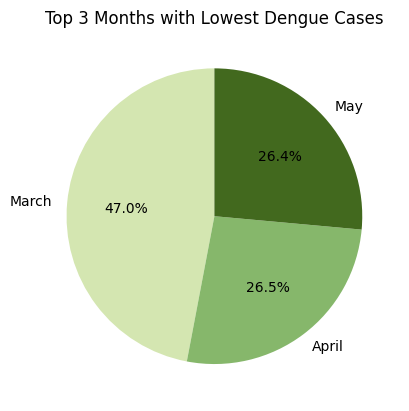

In [15]:
#INSIGHT 9
bottom3_cases = monthly_cases.tail(3)

custom_colors_low = ["#d4e6b1", "#86b76b", "#42691e"]

plt.pie(bottom3_cases, labels=bottom3_cases.index, autopct='%1.1f%%', startangle=90, 
        colors=custom_colors_low, textprops={'fontsize': 10})

plt.title("Top 3 Months with Lowest Dengue Cases", fontsize=12)
plt.show()

<h1>Insight 10: Which month has the largest share of dengue deaths in the top three months?</h1>
<p style="text-decoration: underline">The months of October (49.3%), September (45.4%), and August (5.3%) represent the peak periods for dengue-related fatalities, with October showing the highest proportion, highlighting the need for intensified medical attention and preventative measures during these months.</p>

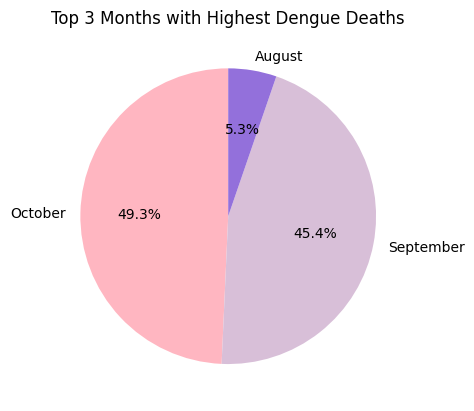

In [16]:
#INSIGHT 10
monthly_deaths = d.groupby("Month")["Dengue_Deaths"].sum().sort_values(ascending=False)

top3_deaths = monthly_deaths.head(3)
custom_colors_pastel = ["#FFB6C1", "#D8BFD8", "#9370DB"]

plt.pie(top3_deaths, labels=top3_deaths.index, autopct='%1.1f%%', startangle=90, colors=custom_colors_pastel, textprops={'fontsize': 10})

plt.title("Top 3 Months with Highest Dengue Deaths",fontsize=12)
plt.show()

<h1>Insight 11: Which month has the biggest portion of the lowest dengue deaths?</h1>
<p style="text-decoration: underline">The months of March (44.6%), April (30.6%), and May (24.8%) represent the periods with the lowest dengue-related death proportions, indicating a period of reduced disease severity or effective medical management during these months.</p>

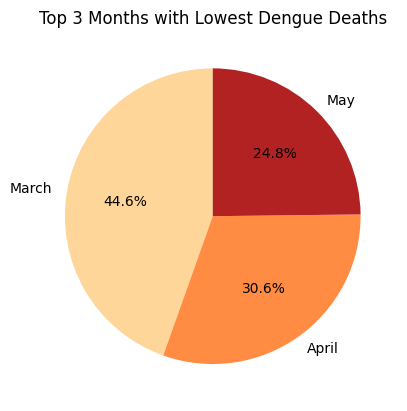

In [17]:
#INSIGHT 11
bottom3_deaths = monthly_deaths.tail(3)

custom_colors_sunset = ["#FFD699", "#FF8C42", "#B22222"]

plt.pie(bottom3_deaths, labels=bottom3_cases.index, autopct='%1.1f%%', startangle=90, 
        colors=custom_colors_sunset, textprops={'fontsize': 10})

plt.title("Top 3 Months with Lowest Dengue Deaths", fontsize=12)
plt.show()

<h1>Insight 12-16: Distribution of Dengue Cases for Every Year</h1>
<p style="text-decoration: underline">The data shows a recurring pattern across 2016-2020 where most of the time dengue cases are relatively low, but there are occasional periods with significantly higher numbers. This suggests that while dengue is generally present, the risk of larger outbreaks is a constant concern and requires continuous monitoring and preparedness.</p>

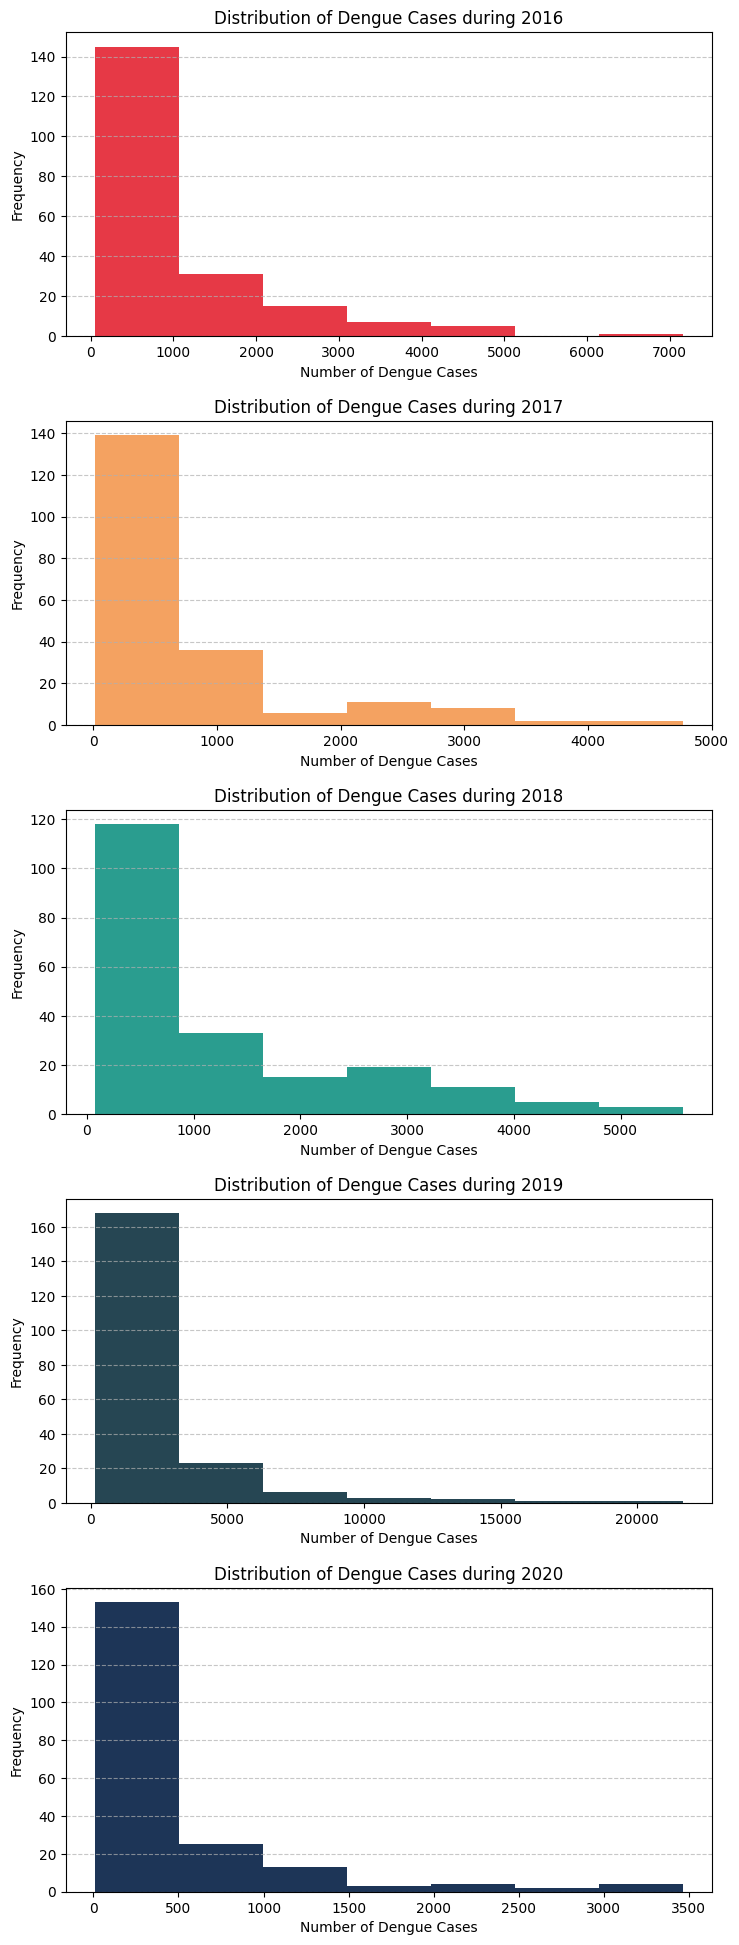

In [18]:
#INSIGHT 12 to 16
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 20))
fig.tight_layout(pad=4.0)
# 2016
d2016 = d[d['Year'] == 2016]
axes[0].hist(d2016['Dengue_Cases'], bins=7, color='#E63946')
axes[0].set_title("Distribution of Dengue Cases during 2016")
axes[0].set_xlabel("Number of Dengue Cases")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# 2017
d2017 = d[d['Year'] == 2017]
axes[1].hist(d2017['Dengue_Cases'], bins=7, color='#F4A261')
axes[1].set_title("Distribution of Dengue Cases during 2017")
axes[1].set_xlabel("Number of Dengue Cases")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# 2018
d2018 = d[d['Year'] == 2018]
axes[2].hist(d2018['Dengue_Cases'], bins=7, color='#2A9D8F')
axes[2].set_title("Distribution of Dengue Cases during 2018")
axes[2].set_xlabel("Number of Dengue Cases")
axes[2].set_ylabel("Frequency")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
# 2019
d2019 = d[d['Year'] == 2019]
axes[3].hist(d2019['Dengue_Cases'], bins=7, color='#264653')
axes[3].set_title("Distribution of Dengue Cases during 2019")
axes[3].set_xlabel("Number of Dengue Cases")
axes[3].set_ylabel("Frequency")
axes[3].grid(axis='y', linestyle='--', alpha=0.7)
# 2020
d2020 = d[d['Year'] == 2020]
axes[4].hist(d2020['Dengue_Cases'], bins=7, color='#1D3557')
axes[4].set_title("Distribution of Dengue Cases during 2020")
axes[4].set_xlabel("Number of Dengue Cases")
axes[4].set_ylabel("Frequency")
axes[4].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<h1>Insight 17: What potential external factors might have contributed to the sudden decline in dengue cases in April 2020?</h1>
<p style="text-decoration: underline">The noticeable drop in dengue cases during April 2020 is likely not a natural fluctuation. Given the timing, it may reflect disruptions in health services, reporting, or population behavior due to external factors like lockdowns or changes in healthcare access, requiring further investigation to understand its true impact on disease transmission.</p>

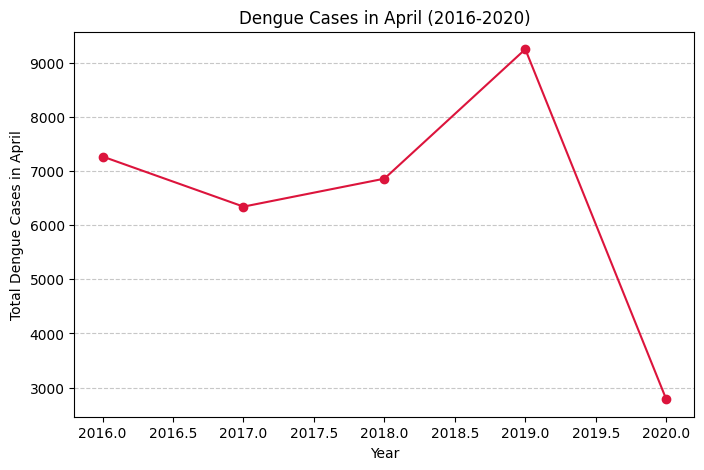

In [19]:
#INSIGHT 17
april_data = d[d['Month'] == "April"]

april_cases_by_year = april_data.groupby("Year")["Dengue_Cases"].sum()

plt.figure(figsize=(8, 5))
plt.plot(april_cases_by_year.index, april_cases_by_year.values, marker="o", linestyle="-", color="crimson")

plt.xlabel("Year")
plt.ylabel("Total Dengue Cases in April")
plt.title("Dengue Cases in April (2016-2020)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<h1>Insight 18: During the year 2018, in Region IV-A, which month had the highest number of dengue deaths?</h1>
<p style="text-decoration: underline">The marked increase in dengue cases, culminating in 31 deaths, specifically during September 2018 within Region IV-A suggests a localized seasonal peak in transmission for that year and region. This is likely attributable to environmental conditions in 2018 that particularly favored mosquito breeding during that month in Region IV-A, emphasizing the need for targeted preventative measures during that specific period.</p>

In [20]:
#INSIGHT 18
region_iva_2018 = d[(d["Region"] == "Region IV-A") & (d["Year"] == 2018)]

monthly_deaths_2018 = region_iva_2018.groupby("Month")["Dengue_Deaths"].sum()

highest_death_month_2018 = monthly_deaths_2018.idxmax()
highest_death_count_2018 = monthly_deaths_2018.max()
print(f"In 2018, the month with the highest dengue deaths in Region IV-A was {highest_death_month_2018} with {highest_death_count_2018} deaths.")

In 2018, the month with the highest dengue deaths in Region IV-A was September with 31 deaths.


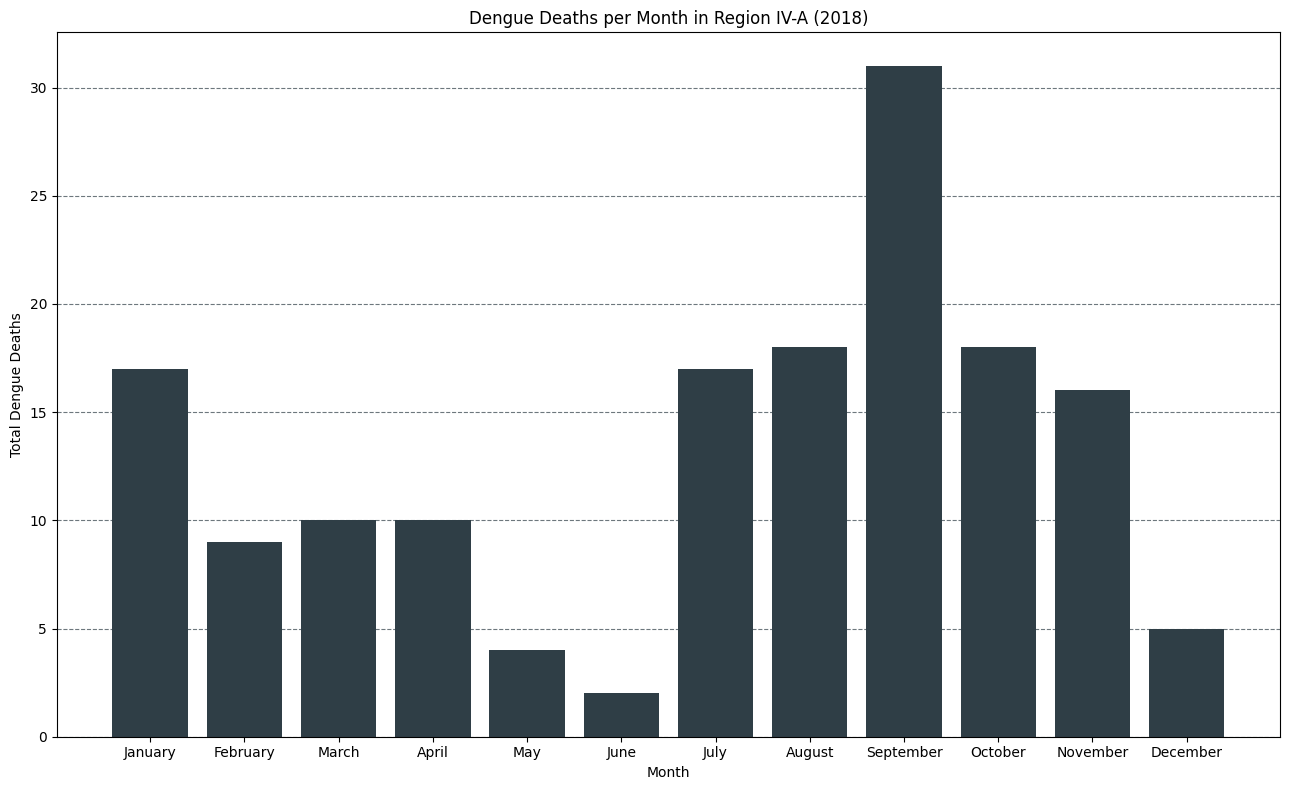

In [21]:
plt.figure(figsize=(13,8))
plt.bar(monthly_deaths_2018.index, monthly_deaths_2018.values, color="#2F3E46")

plt.xlabel("Month")
plt.ylabel("Total Dengue Deaths")
plt.title("Dengue Deaths per Month in Region IV-A (2018)")
plt.grid(linestyle='--',alpha=0.7, axis='y',color='#2F3E46')
plt.tight_layout()
plt.show()

<h1>Insight 19: Which months show the biggest increase in dengue cases?</h1>
<p style="text-decoration: underline">The marked increase in dengue cases specifically during September 2018 within Region IV-A suggests a localized seasonal peak in transmission for that year and region. This is likely attributable to environmental conditions in 2018 that particularly favored mosquito breeding during that month in Region IV-A, emphasizing the need for targeted preventative measures during that specific period.</p>

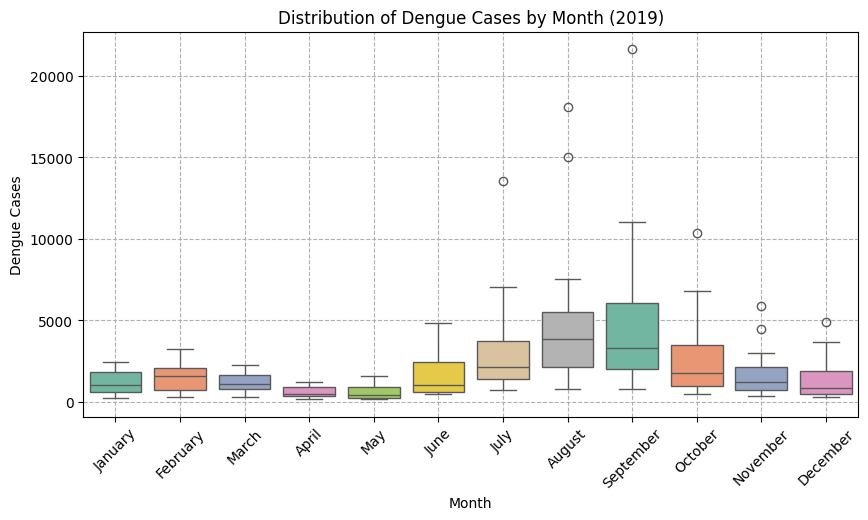

In [22]:
#INSIGHT 19
d_2019 = d[d["Year"] == 2019]

plt.figure(figsize=(10,5))
sns.boxplot(x="Month", y="Dengue_Cases", data=d_2019, palette="Set2")

plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.title("Distribution of Dengue Cases by Month (2019)")
plt.xticks(rotation=45)
plt.grid(linestyle='--')

plt.show()

<h1>Insight 20: Which year shows the biggest changes in dengue cases across different regions?</h1>
<p style="text-decoration: underline">The swarmplot shows that dengue cases vary significantly across regions and years, with 2019 being a particularly high-impact year. This suggests that factors influencing dengue transmission are not uniform and may include regional differences in climate, population density, and public health interventions, making a one-size-fits-all approach to dengue control ineffective.</p>

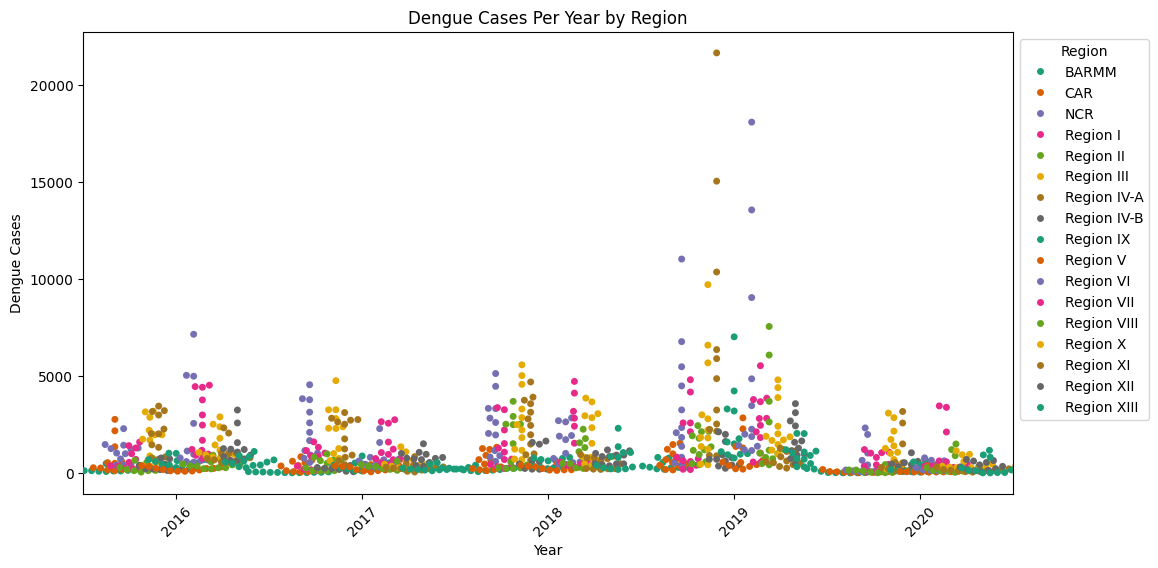

In [23]:
#INSIGHT 20
plt.figure(figsize=(12,6))
sns.swarmplot(x="Year", y="Dengue_Cases", hue="Region", data=d, palette="Dark2", dodge=True)

plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.title("Dengue Cases Per Year by Region")
plt.legend(title="Region", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)

plt.show()